# DataArray - Masking

Similar to numpy arrays, DataArrays can be filtered based on values (e.g. all values above a threshold), which will return a DataArray with boolean values. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mikeio

## Surface elevation in Oresund

Read 3 timesteps of Surface elevation from dfsu2d file.

In [2]:
fn = "../tests/testdata/oresundHD_run1.dfsu"
da = mikeio.read(fn, items="Surface elevation", time=[0,2,4])[0]
da

<mikeio.DataArray>
name: Surface elevation
dims: (time:3, element:3612)
time: 2018-03-07 00:00:00 - 2018-03-11 00:00:00 (3 records)
geometry: Dfsu2D (3612 elements, 2046 nodes)

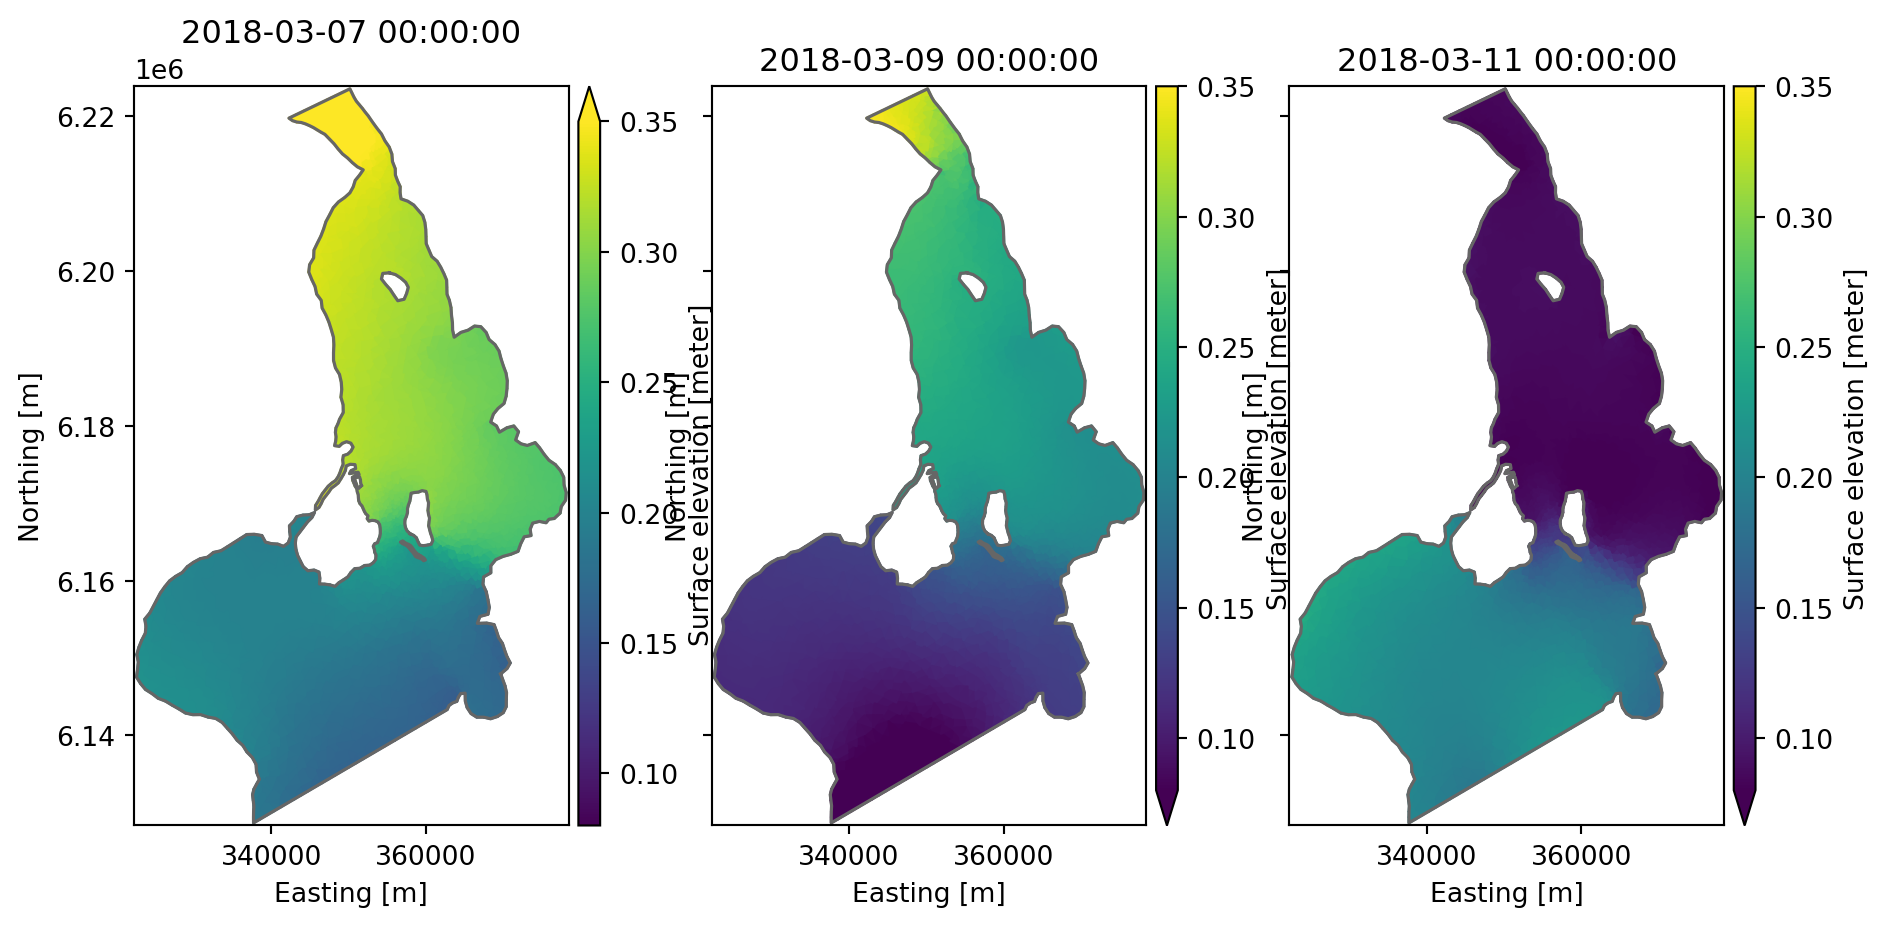

In [3]:
_, ax = plt.subplots(1, da.n_timesteps, figsize=(11,5), sharey=True)
for step in range(da.n_timesteps):
    da[step].plot(ax=ax[step], vmin=0.08, vmax=0.35)

## Mask values below 0.2m

Assume that we are not interested in values below 0.2m. Let us find those and call the DataArray mask. 

In [4]:
threshold = 0.2
mask = da<threshold
mask

<mikeio.DataArray>
name: Boolean
dims: (time:3, element:3612)
time: 2018-03-07 00:00:00 - 2018-03-11 00:00:00 (3 records)
geometry: Dfsu2D (3612 elements, 2046 nodes)

Now let's set define a new DataArray wl_capped for which we set all values below the threshold to NaN.

In [5]:
wl_capped = da.copy()
wl_capped[mask] = np.nan
wl_capped

<mikeio.DataArray>
name: Surface elevation
dims: (time:3, element:3612)
time: 2018-03-07 00:00:00 - 2018-03-11 00:00:00 (3 records)
geometry: Dfsu2D (3612 elements, 2046 nodes)

Now let's plot both the boolean mask and the new capped DataArray for each of the three timesteps

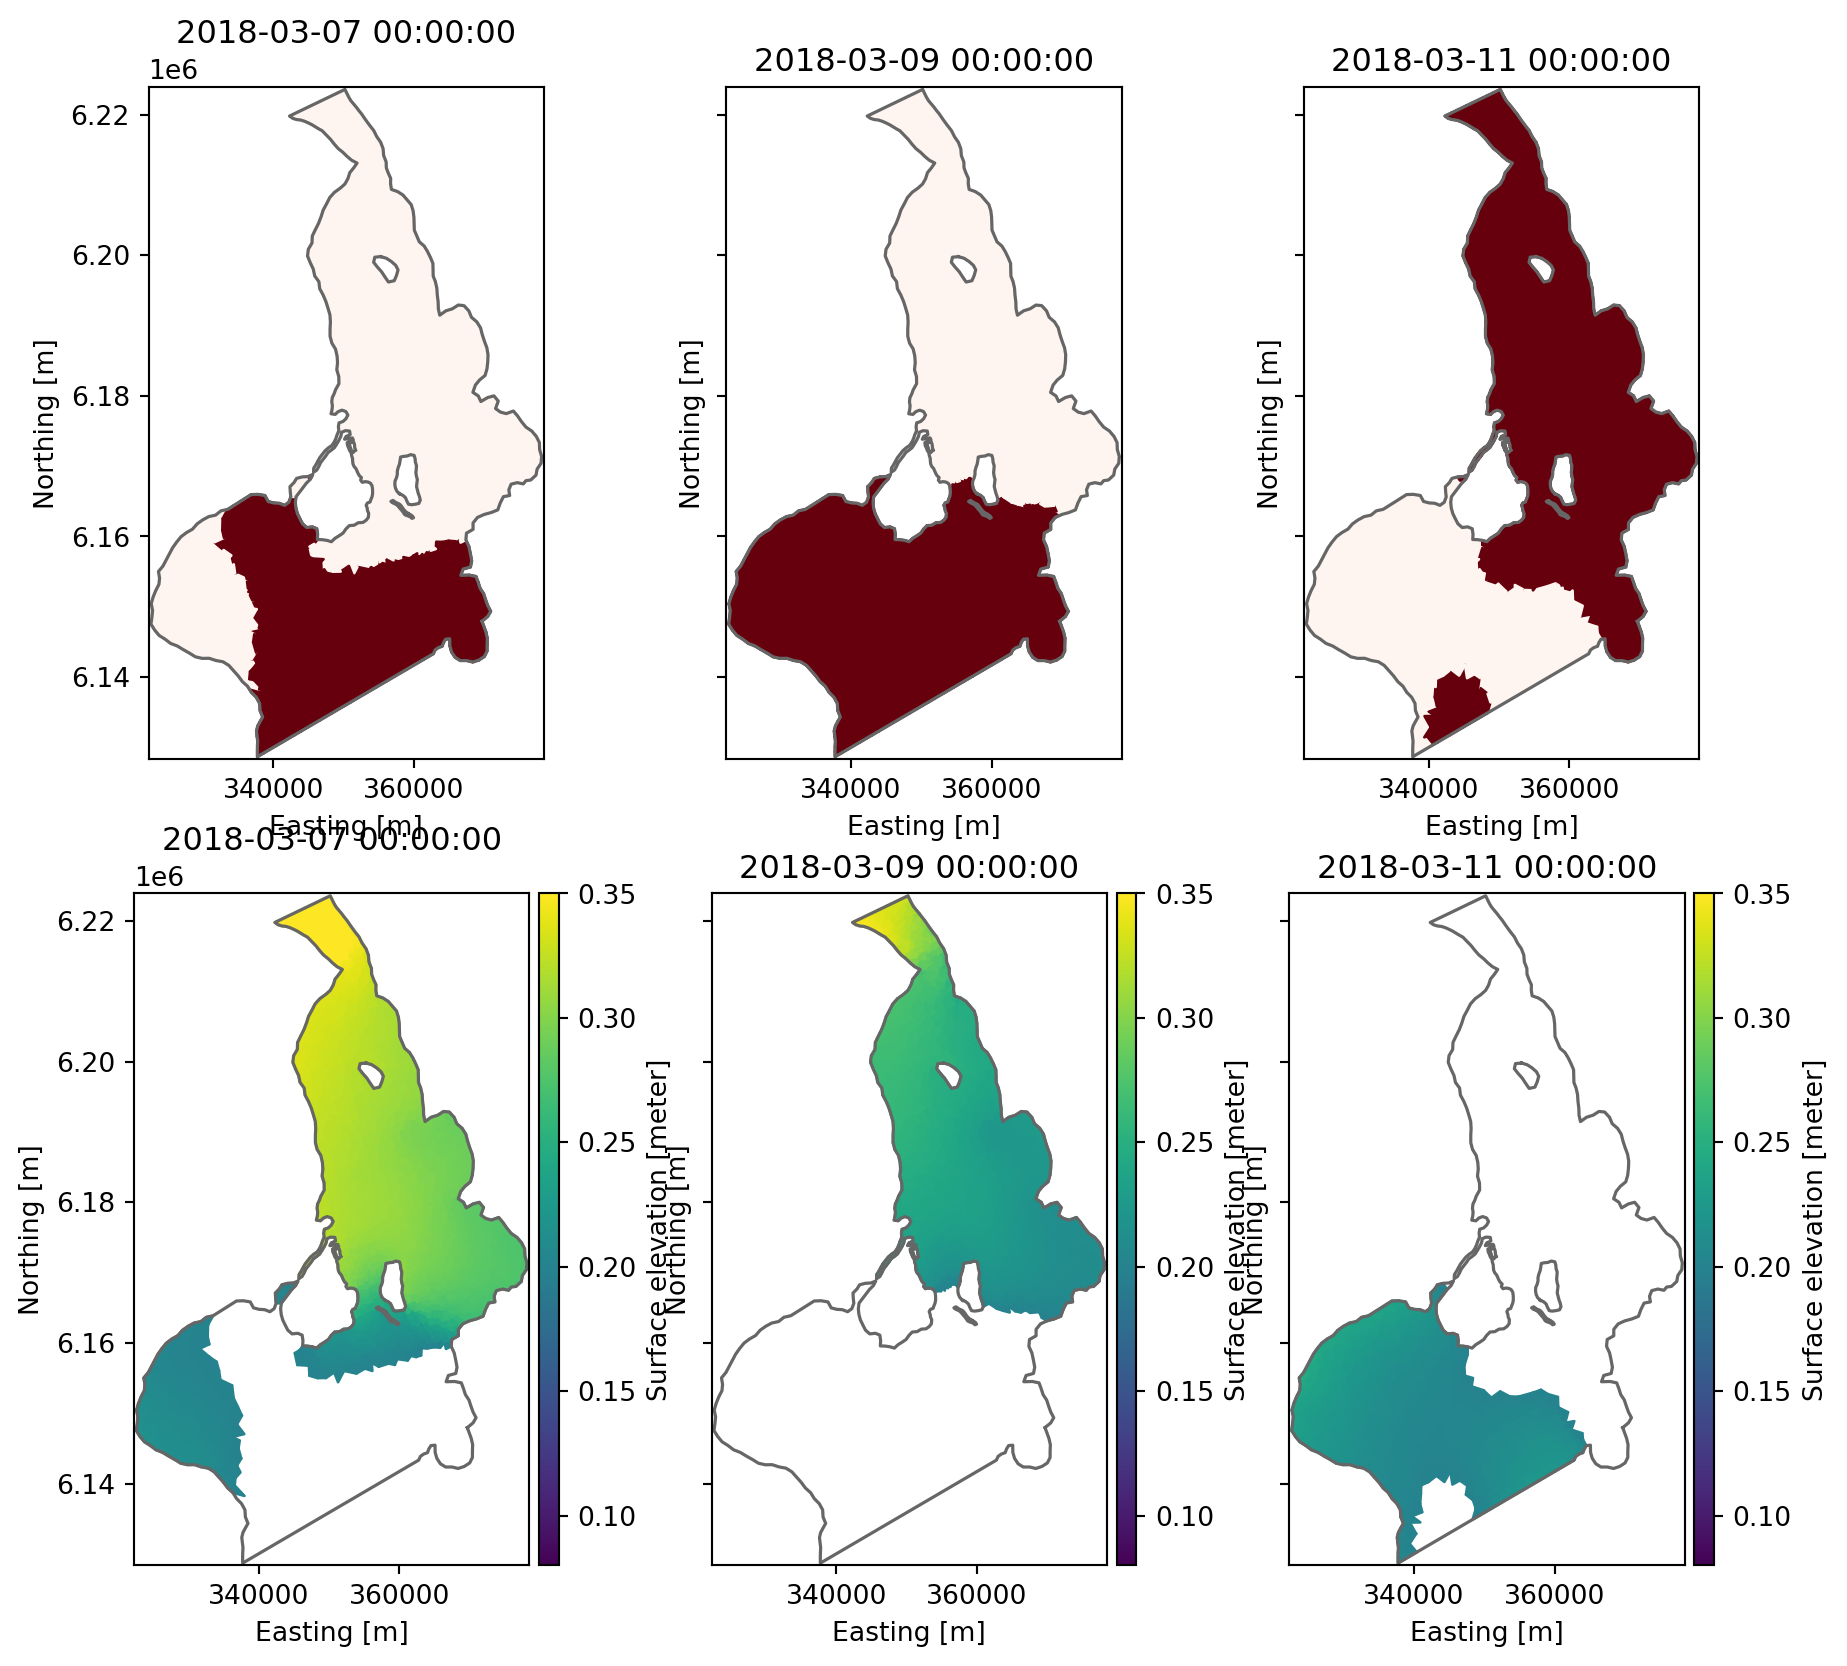

In [6]:
_, ax = plt.subplots(2, da.n_timesteps, figsize=(11,10), sharey=True)
for step in range(da.n_timesteps):
    mask[step].plot(ax=ax[0,step], cmap="Reds", add_colorbar=False)
    wl_capped[step].plot(ax=ax[1,step], vmin=0.08, vmax=0.35)

## Boolean indexing with numpy array

The boolean indexing can also be done with a plain numpy array (it does not need to be a mikeio.DataArray). 

In this example, we set all elements with depth lower than -10m to NaN. 

In [7]:
ze = da.geometry.element_coordinates[:,2]
ze.shape

(3612,)

In [8]:
wl_shallow = da.copy()
wl_shallow[ze<-10] = np.nan  # select all elements with depth lower than -10m
wl_shallow.shape

(3, 3612)

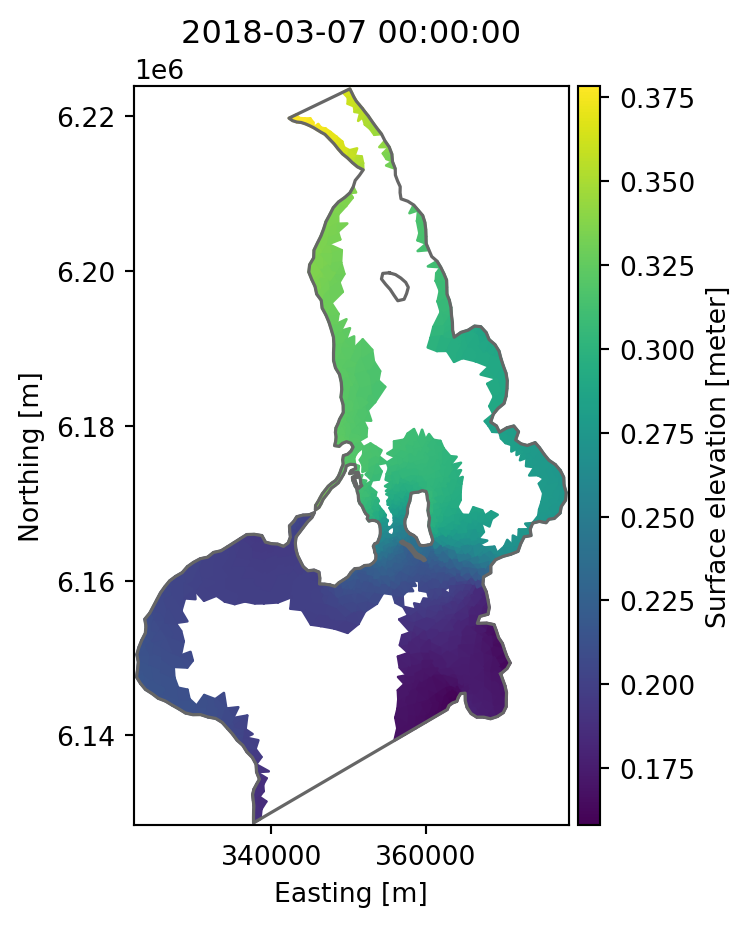

In [9]:
wl_shallow.plot();